In [2]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np
import os
import cv2

In [3]:
df = pd.read_csv("/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    22424 non-null  object
 1   classname  22424 non-null  object
 2   img        22424 non-null  object
dtypes: object(3)
memory usage: 525.7+ KB


In [5]:
df.describe()

,subject,classname,img
count,22424,22424,22424
unique,26,10,22424
top,p021,c0,img_9684.jpg
freq,1237,2489,1


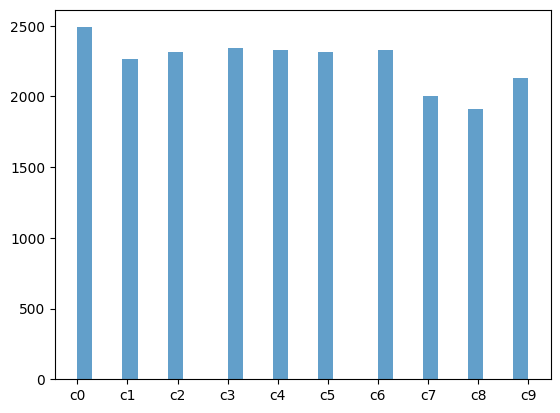

In [7]:
mpl.hist(df["classname"], bins=30, alpha=0.7)
mpl.show()

In [11]:
print(df["subject"].unique())
print(len(df["subject"].unique()))
print()

['p002' 'p012' 'p014' 'p015' 'p016' 'p021' 'p022' 'p024' 'p026' 'p035'
 'p039' 'p041' 'p042' 'p045' 'p047' 'p049' 'p050' 'p051' 'p052' 'p056'
 'p061' 'p064' 'p066' 'p072' 'p075' 'p081']
26


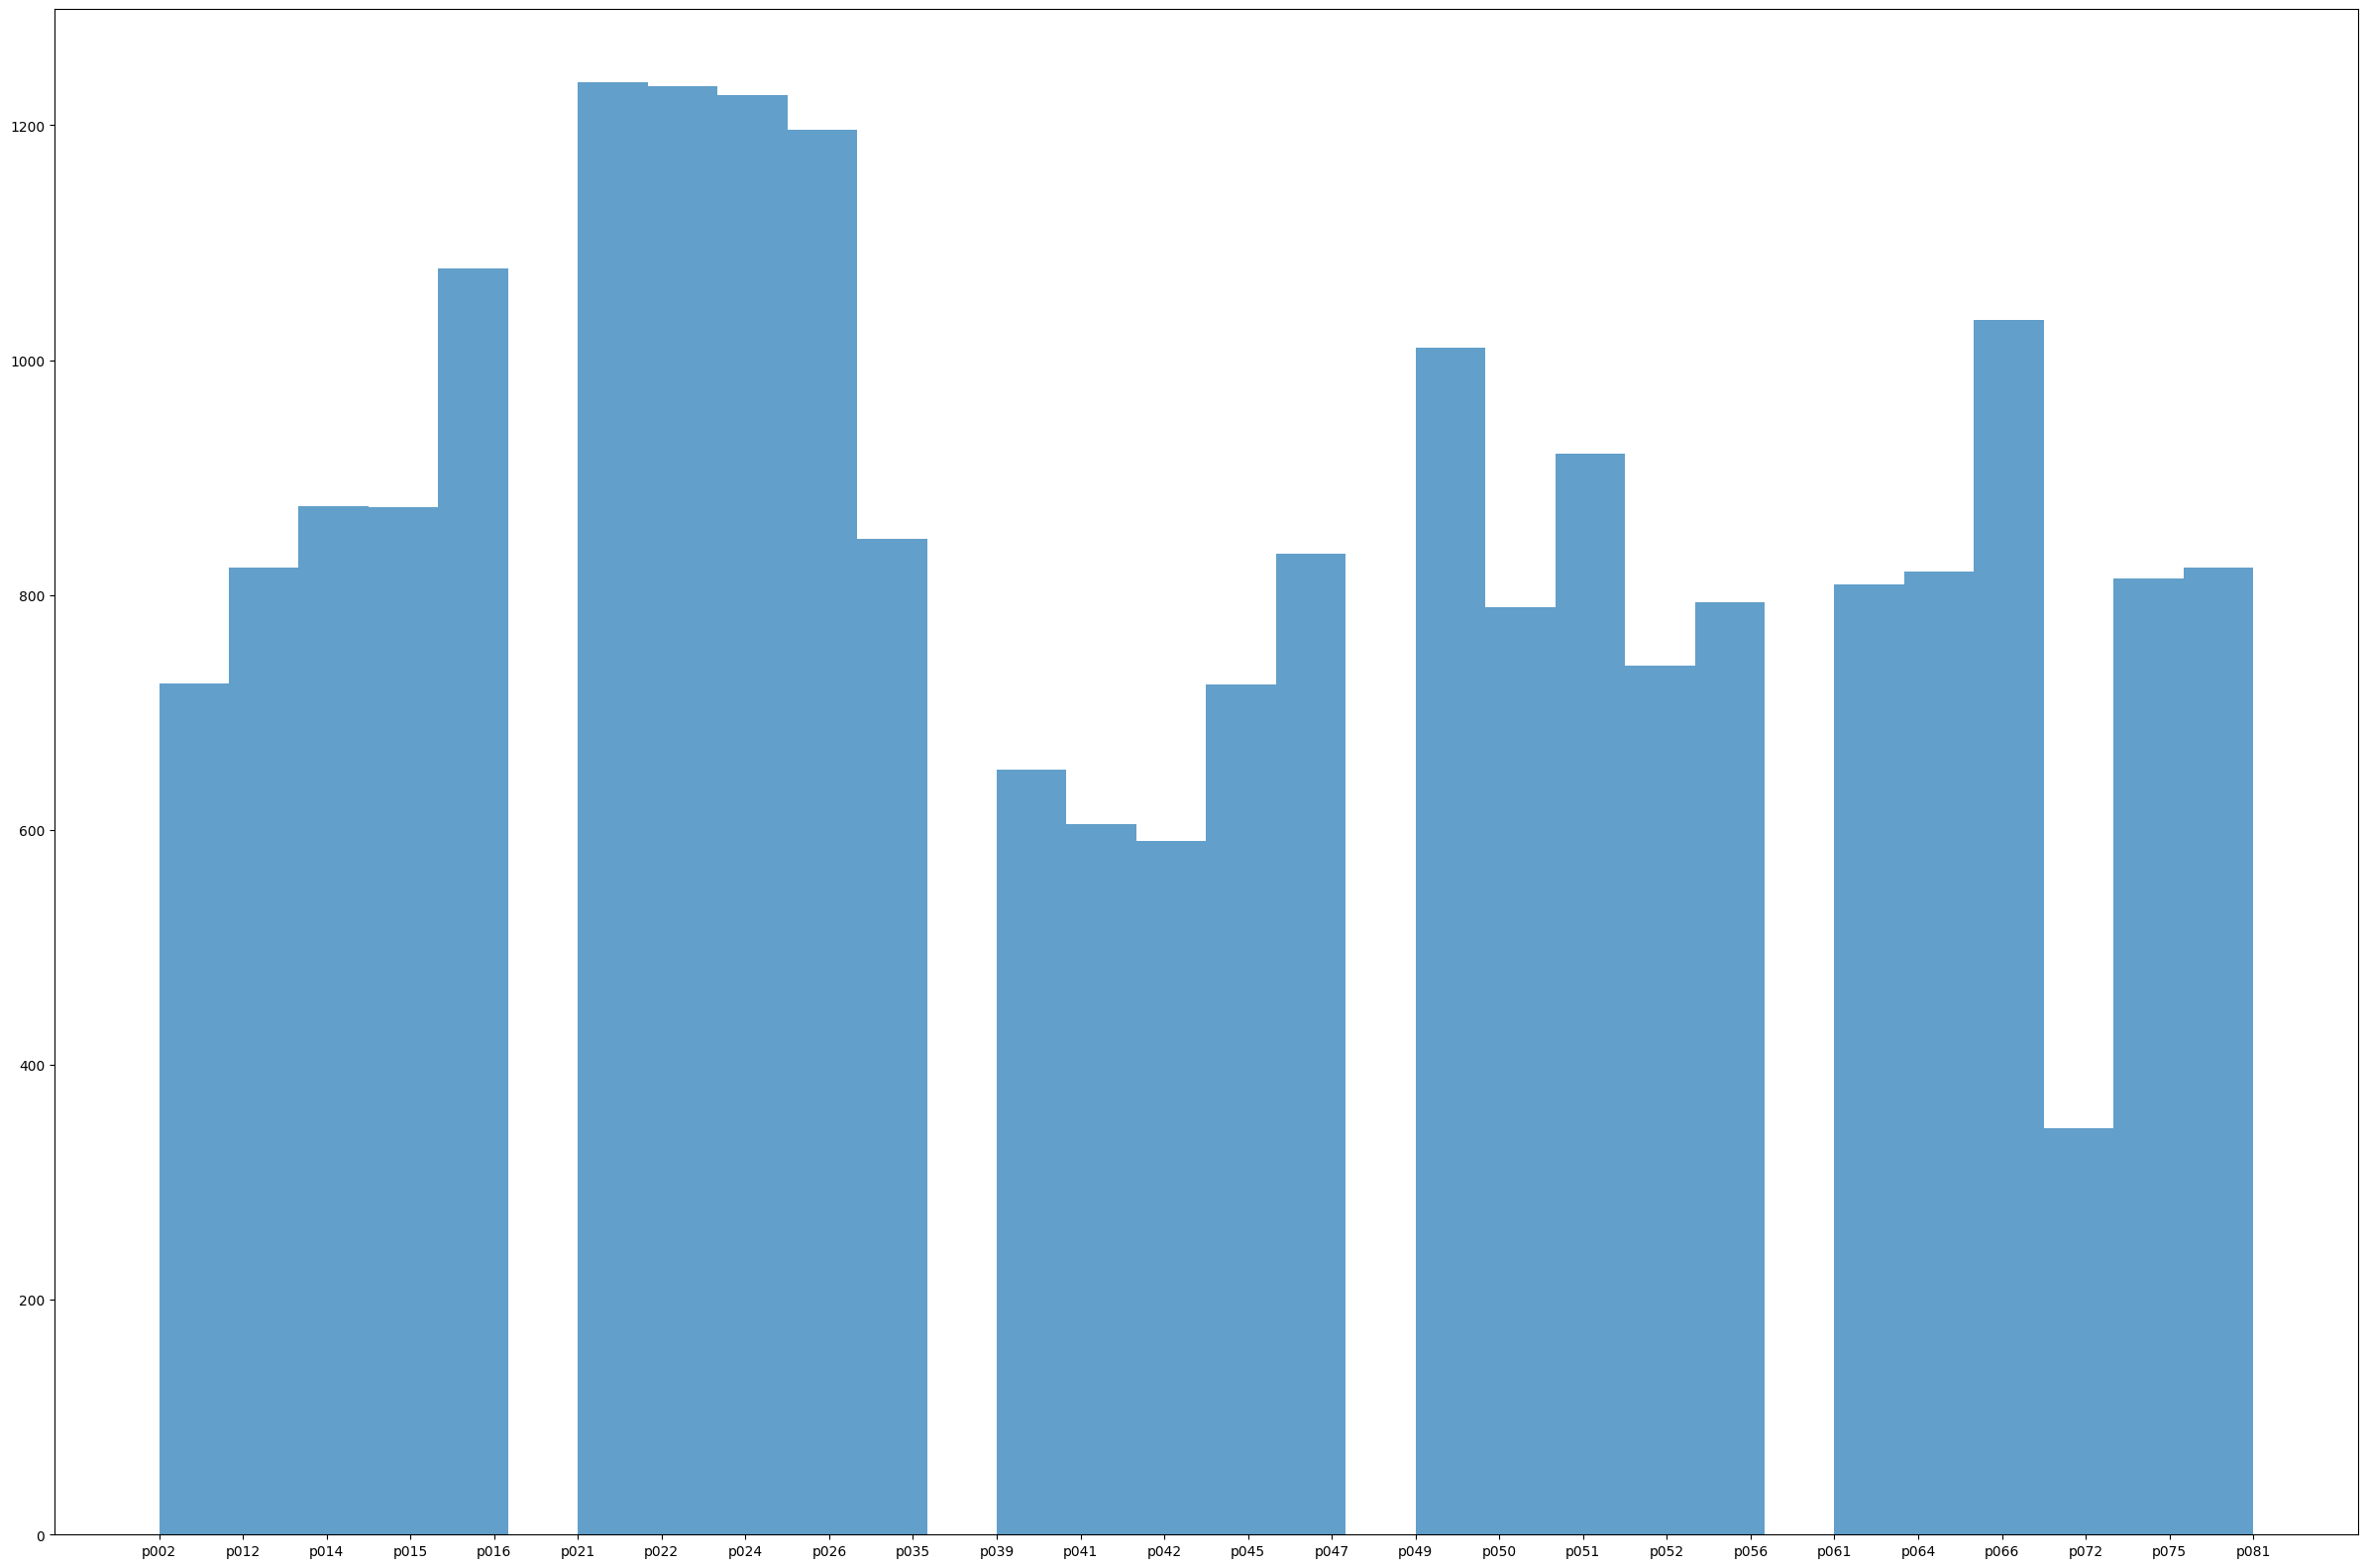

In [18]:
mpl.figure(figsize = (30, 20))
mpl.hist(df["subject"], bins=30, alpha=0.7)
mpl.show()

In [19]:
subject_counts = df["subject"].value_counts()
print(subject_counts, type(subject_counts))

subject
p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p081     823
p012     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: count, dtype: int64 <class 'pandas.core.series.Series'>


In [23]:
import os
import cv2
from collections import defaultdict

train_path = "/kaggle/input/state-farm-distracted-driver-detection/imgs/train"
dimension_counts = defaultdict(int)


for root, _, files in os.walk(train_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path)
            if img is not None:
                dimension = (img.shape[1], img.shape[0])
                dimension_counts[dimension] += 1

dimension_counts = dict(dimension_counts)

print(dimension_counts)


{(640, 480): 22424}
